# Plot sMAPE

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
sys.path.append('/home/clb/AQP/')
from utils import load_table
src_df = load_table("lineitem")
print(src_df.shape)


(6001215, 8)


# Plot all err


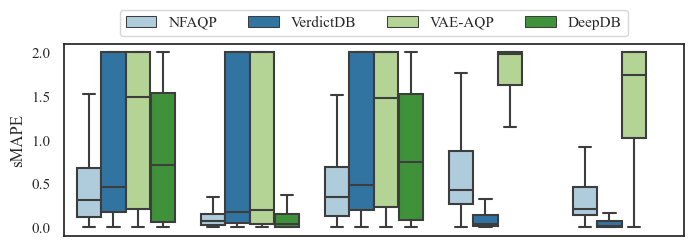

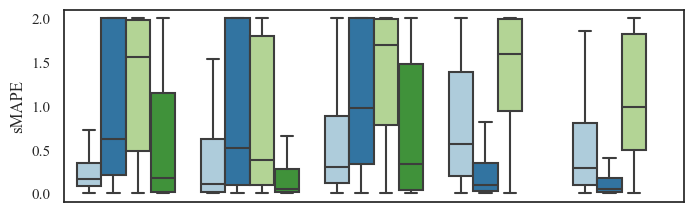

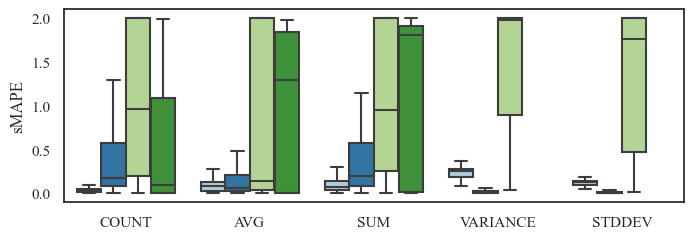

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
n_pred_tresh = 5
ratio = 3.5
high = 2.5
for i, dataset in enumerate(['flights', 'pm25', 'lineitem']):
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval.csv')
    df = df[df['n_predicates'] <= n_pred_tresh]
    methods = ['flow', 'verdict', 'vae', 'deepdb']
    funcs = ['cnt', 'avg', 'sum', 'var', 'std']

    methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE-AQP', 'DeepDB'])}
    funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VARIANCE', 'STDDEV'])}

    plot_df = pd.DataFrame([], columns=['Methods', 'Aggregation Functions', 'sMAPE'])

    N = df.shape[0]
    for m in methods:
        for f in funcs:
            if m == 'deepdb' and f in ['var', 'std']:
                continue
            err_col = df [f'{m}_{f}_err']
            sub_df = pd.DataFrame([[funcs_alias[f]] * N, [methods_alias[m]] * N, err_col]).transpose()
            sub_df.columns = plot_df.columns
            plot_df = pd.concat([plot_df, sub_df])


    fig = plt.figure(figsize=(int(high * ratio), high))
    sns.set(font="Times New Roman", style='white', palette="Paired", font_scale=1)
    ax = sns.boxplot(x="Methods", y="sMAPE",
                    hue="Aggregation Functions", showfliers=False, palette="Paired",
                    data=plot_df)
    ax.set(xlabel=None)
    if i != 2:
        ax.set_xticklabels([])
    if i != 0:
        ax.get_legend().remove()
    else:
        sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=True)
        pass
    sns.set_style("whitegrid") # 白色网格背景
    

    plt.savefig(f"./err/{dataset}_err.pdf", format="pdf", dpi=1200, bbox_inches="tight")


# Vary Num Predicates

# Plot group by err


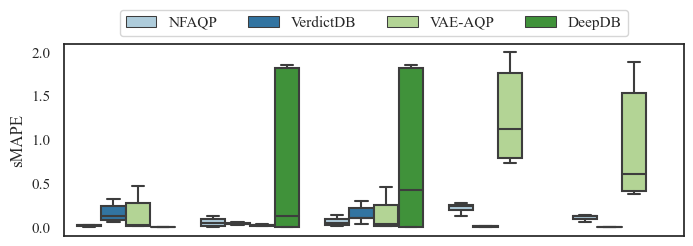

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
n_pred_tresh = 5
ratio = 3.5
high = 2.5
for i, dataset in enumerate(['lineitem']):
    df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval-groupby.csv')
    df = df[df['n_predicates'] <= n_pred_tresh]
    methods = ['flow', 'verdict', 'vae', 'deepdb']
    funcs = ['cnt', 'avg', 'sum', 'var', 'std']

    methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE-AQP', 'DeepDB'])}
    funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VARIANCE', 'STDDEV'])}

    plot_df = pd.DataFrame([], columns=['Methods', 'Aggregation Functions', 'sMAPE'])

    N = df.shape[0]
    for m in methods:
        for f in funcs:
            if m == 'deepdb' and f in ['var', 'std']:
                continue
            err_col = df [f'{m}_{f}_err']
            sub_df = pd.DataFrame([[funcs_alias[f]] * N, [methods_alias[m]] * N, err_col]).transpose()
            sub_df.columns = plot_df.columns
            plot_df = pd.concat([plot_df, sub_df])


    fig = plt.figure(figsize=(int(high * ratio), high))
    sns.set(font="Times New Roman", style='white', palette="Paired", font_scale=1)
    ax = sns.boxplot(x="Methods", y="sMAPE",
                    hue="Aggregation Functions", showfliers=False, palette="Paired",
                    data=plot_df)
    ax.set(xlabel=None)
    if i != 2:
        ax.set_xticklabels([])
    if i != 0:
        ax.get_legend().remove()
    else:
        sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=True)
        pass
    sns.set_style("whitegrid") # 白色网格背景
    

    plt.savefig(f"./err/{dataset}_err.pdf", format="pdf", dpi=1200, bbox_inches="tight")


# Orther

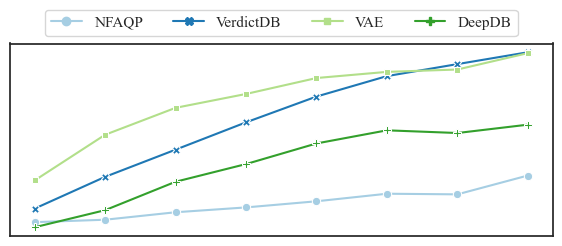

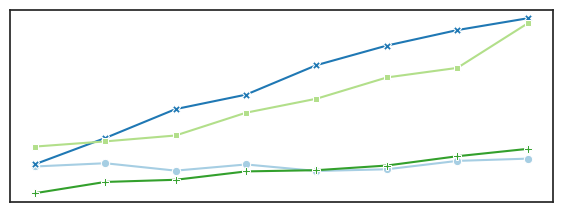

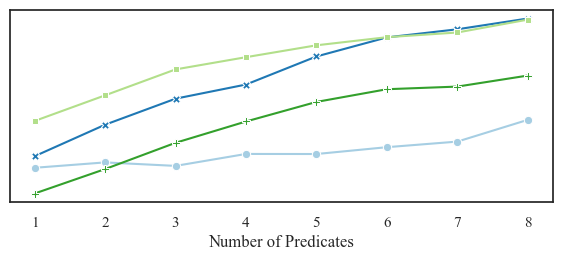

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ratio = 3
high = 2.5
dataset = 'pm25'
df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval.csv')
df['selectivity'] *= 100
methods = ['flow', 'verdict', 'vae', 'deepdb']
funcs = ['cnt', 'avg', 'sum', 'var', 'std']
methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE', 'DeepDB'])}
funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VAR', 'STD'])}
for idx, func in enumerate(['cnt', 'avg', 'sum']):
    x = list(range(1, df['n_predicates'].max() + 1))    # num of pred
    y = {m:[] for m in methods}
    sels = []
    for n in x:
        sub_df = df[df['n_predicates'] == n].mean()
        sels.append(sub_df['selectivity'])
        for m in methods:
            for f in funcs:
                if f != func:
                    continue;
                if m == 'deepdb' and f in ['var', 'std']:
                    continue
                err = sub_df[f'{m}_{f}_err']
                y[m].append(err)

    plot_df = []
    for m in methods:
        for a, b, s in zip(x, y[m], sels):
            plot_df.append([s, a, b, methods_alias[m]])

    plot_df = pd.DataFrame(plot_df, columns=["Selectivity", "Number of Predicates", 'Mean sMAPE', 'Methods'])


    fig = plt.figure(figsize=(int(high * ratio), high))
    sns.set(font="Times New Roman", style='white', palette="Paired")
    # sns.despine()
    ax = sns.lineplot(
        data=plot_df,
        x="Number of Predicates", y="Mean sMAPE", hue="Methods", style="Methods",
        markers=True, dashes=False, errorbar=('ci', False)
    )

    # ax.set_xticks(x)
    # ax.set_xticklabels([f"{n_p} ({s:.2f}%)" for n_p, s in zip(x, sels)])
    # ax.set_xlabel("Number of Predicates  (Mean Selectivity)") # 设置x轴标签
    
    ax.set_ylabel("")
    ax.set_yticklabels([])

    if idx == 0:
        sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=True)
    else:
        ax.get_legend().remove()
    
    if idx == 2:
        # ax.set_xticklabels([f"{n_p} ({s:.2f}%)" for n_p, s in zip(x, sels)])
        # ax.set_xlabel("Number of Predicates  (Mean Selectivity)") # 设置x轴标签
        ax.set_xticks(x)
        ax.set_xticklabels([f"{n_p}" for n_p, s in zip(x, sels)])
        ax.set_xlabel("Number of Predicates") # 设置x轴标签
    else:
        ax.set_xticks([])
        ax.set_xlabel("") # 设置x轴标签
    plt.savefig(f"./vary/{func}.pdf", format="pdf", dpi=1200, bbox_inches="tight")



## 结合热力图

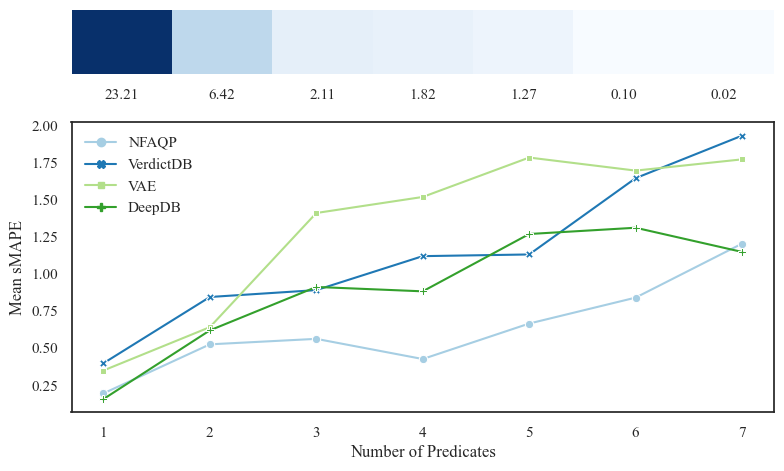

In [51]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = 'flights'
df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval.csv')
df['selectivity'] *= 100
methods = ['flow', 'verdict', 'vae', 'deepdb']
funcs = ['cnt', 'avg', 'sum', 'var', 'std']
methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE', 'DeepDB'])}
funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VAR', 'STD'])}
x = list(range(1, df['n_predicates'].max() + 1))
y = {m:[] for m in methods}
sels = []
for n in x:
    sub_df = df[df['n_predicates'] == n].mean()
    sels.append(sub_df['selectivity'])
    for m in methods:
        for f in funcs:
            if f != 'sum':
                continue;
            if m == 'deepdb' and f in ['var', 'std']:
                continue
            err = sub_df[f'{m}_{f}_err']
            y[m].append(err)

plot_df = []
for m in methods:
    for a, b, s in zip(x, y[m], sels):
        plot_df.append([s, a, b, methods_alias[m]])

plot_df = pd.DataFrame(plot_df, columns=["Selectivity", "Number of Predicates", 'Mean sMAPE', 'Methods'])



width = 12
ratio = 0.4
# fig = plt.figure(figsize=(width, int(width * ratio)))
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(5, 1)
# 绘制折线图

ax2 = fig.add_subplot(gs[1, :])
ax1 = fig.add_subplot(gs[2:, :])

sns.set(font="Times New Roman", style='white', palette="Paired")
# sns.despine()
ax = sns.lineplot(
    data=plot_df,
    x="Number of Predicates", y="Mean sMAPE", hue="Methods", style="Methods",
    markers=True, dashes=False, errorbar=('ci', False), ax=ax1,
)
# sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
sns.move_legend(ax, 'best', title=None, frameon=False)

sns.heatmap(np.expand_dims(sels, axis=0), cmap='Blues', cbar=False, ax=ax2, xticklabels=[f"{s:.2f}" for s in sels])
# 隐藏第二个 y 轴的坐标轴
ax2.set_yticks([])
plt.tight_layout()
plt.savefig(f"{dataset}_vary_n_predicates.pdf", format="pdf", dpi=1200, bbox_inches="tight")

In [48]:
[f"{s:.2f}" for s in sels]

['23.21', '6.42', '2.11', '1.82', '1.27', '0.10', '0.02']

In [24]:
img = np.array(sels) / 100.0
img = np.reshape(img, (1, -1))

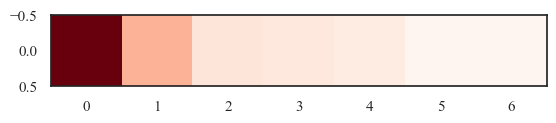

In [26]:
plt.imshow(img, cmap='Reds')

# Others

<AxesSubplot:xlabel='year', ylabel='month'>

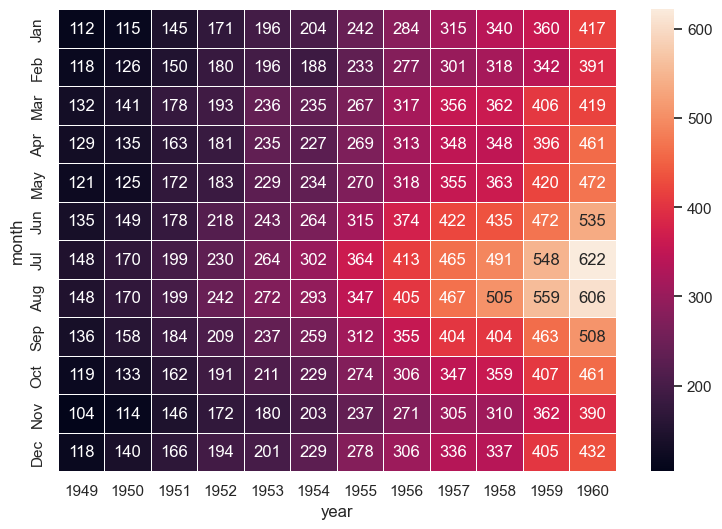

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)